In [1]:
import numpy as np
import pandas as pd
from pathlib import Path

df = pd.read_csv(Path("QUANDL_FRED_T10Y2Y, 1D 80PERCENT.csv"))
df

,time,2-10 Bond Spread,"SPX, SPCFD: Compare"
0,2010-04-09T00:00:00Z,2.82,1194.37
1,2010-04-12T00:00:00Z,2.80,1196.48
2,2010-04-13T00:00:00Z,2.77,1197.30
3,2010-04-14T00:00:00Z,2.81,1210.65
4,2010-04-15T00:00:00Z,2.82,1211.67
...,...,...,...
1994,2018-03-28T00:00:00Z,0.49,2605.00
1995,2018-03-29T00:00:00Z,0.47,2640.87
1996,2018-04-02T00:00:00Z,0.48,2581.88
1997,2018-04-03T00:00:00Z,0.51,2614.45


In [2]:
# shift bond spread so that yesterday's bond spread is regressed against today's price
df['2-10 Bond Spread'] = df['2-10 Bond Spread'].shift(1) 

In [3]:
# regress against change from yesterday's price instead of today's absolute price
df['returns']= df['SPX, SPCFD: Compare']/df['SPX, SPCFD: Compare'].shift(1) - 1
df

,time,2-10 Bond Spread,"SPX, SPCFD: Compare",returns
0,2010-04-09T00:00:00Z,NaN,1194.37,NaN
1,2010-04-12T00:00:00Z,2.82,1196.48,0.001767
2,2010-04-13T00:00:00Z,2.80,1197.30,0.000685
3,2010-04-14T00:00:00Z,2.77,1210.65,0.011150
4,2010-04-15T00:00:00Z,2.81,1211.67,0.000843
...,...,...,...,...
1994,2018-03-28T00:00:00Z,0.52,2605.00,-0.002917
1995,2018-03-29T00:00:00Z,0.49,2640.87,0.013770
1996,2018-04-02T00:00:00Z,0.47,2581.88,-0.022337
1997,2018-04-03T00:00:00Z,0.48,2614.45,0.012615


In [4]:
df = df[1:] # remove first row with an N/A
df

,time,2-10 Bond Spread,"SPX, SPCFD: Compare",returns
1,2010-04-12T00:00:00Z,2.82,1196.48,0.001767
2,2010-04-13T00:00:00Z,2.80,1197.30,0.000685
3,2010-04-14T00:00:00Z,2.77,1210.65,0.011150
4,2010-04-15T00:00:00Z,2.81,1211.67,0.000843
5,2010-04-16T00:00:00Z,2.82,1192.13,-0.016127
...,...,...,...,...
1994,2018-03-28T00:00:00Z,0.52,2605.00,-0.002917
1995,2018-03-29T00:00:00Z,0.49,2640.87,0.013770
1996,2018-04-02T00:00:00Z,0.47,2581.88,-0.022337
1997,2018-04-03T00:00:00Z,0.48,2614.45,0.012615


In [5]:
df['time'] = df['time'].astype('datetime64[ns]') # change "time" column type from str to datetime64
df.set_index('time', inplace=True) # set time column as the index

df

C:\Users\gblan\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,2-10 Bond Spread,"SPX, SPCFD: Compare",returns
time,,,
2010-04-12,2.82,1196.48,0.001767
2010-04-13,2.80,1197.30,0.000685
2010-04-14,2.77,1210.65,0.011150
2010-04-15,2.81,1211.67,0.000843
2010-04-16,2.82,1192.13,-0.016127
...,...,...,...
2018-03-28,0.52,2605.00,-0.002917
2018-03-29,0.49,2640.87,0.013770
2018-04-02,0.47,2581.88,-0.022337


In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [7]:
# set the training data columns and target variable
y_train = df["returns"]
X_train = df.drop(columns=["SPX, SPCFD: Compare", "returns"])

In [8]:
y_train

time
2010-04-12    0.001767
2010-04-13    0.000685
2010-04-14    0.011150
2010-04-15    0.000843
2010-04-16   -0.016127
                ...   
2018-03-28   -0.002917
2018-03-29    0.013770
2018-04-02   -0.022337
2018-04-03    0.012615
2018-04-04    0.011566
Name: returns, Length: 1998, dtype: float64

In [9]:
random_forest = RandomForestRegressor(max_depth=5, n_estimators=100, random_state=1)

In [10]:
random_forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [11]:
from sklearn.metrics import mean_squared_error

root_mean_squared_error = np.sqrt(mean_squared_error(y_train, random_forest.predict(X_train)))
root_mean_squared_error

0.009310731251200473

In [12]:
random_forest = RandomForestRegressor(max_depth=10, n_estimators=100, random_state=1)
random_forest.fit(X_train, y_train)
root_mean_squared_error = np.sqrt(mean_squared_error(y_train, random_forest.predict(X_train)))
root_mean_squared_error

0.009083679274932605

In [13]:
random_forest = RandomForestRegressor(max_depth=50, n_estimators=100, random_state=1)
random_forest.fit(X_train, y_train)
root_mean_squared_error = np.sqrt(mean_squared_error(y_train, random_forest.predict(X_train)))
root_mean_squared_error

0.008943288173833334

In [14]:
(np.abs(y_train)).mean()

0.006463086552342707

In [15]:
unseen_data = pd.read_csv(Path("unseen_data.csv"))
unseen_data['2-10 Bond Spread'] = unseen_data['2-10 Bond Spread'].shift(1)
unseen_data['returns']= unseen_data['SPX, SPCFD: Compare']/unseen_data['SPX, SPCFD: Compare'].shift(1) - 1
unseen_data = unseen_data[1:]
unseen_data['time'] = unseen_data['time'].astype('datetime64[ns]') # change "time" column type from str to datetime64
unseen_data.set_index('time', inplace=True) # set time column as the index
unseen_data

,2-10 Bond Spread,"SPX, SPCFD: Compare",returns
time,,,
2018-04-06,0.53,2604.47,-0.021920
2018-04-09,0.50,2613.16,0.003337
2018-04-10,0.49,2656.87,0.016727
2018-04-11,0.48,2642.19,-0.005525
2018-04-12,0.47,2663.99,0.008251
...,...,...,...
2020-04-23,0.41,2797.81,-0.000539
2020-04-24,0.39,2836.75,0.013918
2020-04-27,0.38,2878.49,0.014714


In [16]:
y_unseen = unseen_data["returns"]
X_unseen = unseen_data.drop(columns=["SPX, SPCFD: Compare", "returns"])

root_mean_squared_error = np.sqrt(mean_squared_error(y_unseen, random_forest.predict(X_unseen)))
root_mean_squared_error

0.018704827013423832

In [17]:
y = df["returns"]
X = df.drop(columns=["SPX, SPCFD: Compare", "returns"])

train_fraction = 0.8
split_point = int(train_fraction *len(X)) # (len(X) and len(y) are the same anyway)
X_train = X[0:split_point]
X_valid = X[split_point:]

y_train= y[0:split_point]
y_valid= y[split_point:]

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8,test_size=0.2, random_state=101)

In [19]:
print("len(df): {}, split_point: {}, len(X_train): {}, len(X_valid): {}, len(y_train): {}, len(y_valid): {}".format(len(df), split_point, len(X_train), len(X_valid), len(y_train), len(y_valid))) 

len(df): 1998, split_point: 1598, len(X_train): 1598, len(X_valid): 400, len(y_train): 1598, len(y_valid): 400


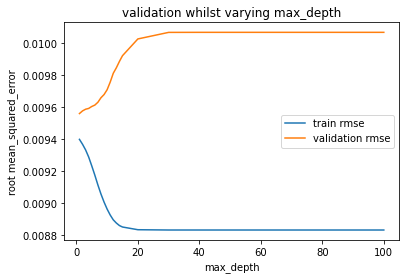

In [21]:
import matplotlib.pyplot as plt

train_errors = []
valid_errors = []
param_range = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,30,40,50,75,100]

for max_depth in param_range:
    random_forest = RandomForestRegressor(max_depth=max_depth, n_estimators=100, random_state=1)
    random_forest.fit(X_train, y_train)
    
    train_errors.append(np.sqrt(mean_squared_error(y_train, random_forest.predict(X_train))))
    valid_errors.append(np.sqrt(mean_squared_error(y_valid, random_forest.predict(X_valid))))
    
plt.title("validation whilst varying max_depth")
plt.xlabel('max_depth')
plt.ylabel('root mean_squared_error')
plt.plot(param_range, train_errors, label="train rmse")
plt.plot(param_range, valid_errors, label="validation rmse")
plt.legend()
plt.show()

In [22]:
random_forest = RandomForestRegressor(max_depth=1, n_estimators=100, random_state=1)
random_forest.fit(X, y)
root_mean_squared_error = np.sqrt(mean_squared_error(y, random_forest.predict(X)))
root_mean_squared_error

0.00942170960852716

In [23]:
root_mean_squared_error = np.sqrt(mean_squared_error(y_unseen, random_forest.predict(X_unseen)))
root_mean_squared_error

0.017679233094329314

In [24]:
# split the full data 80:20 into training:validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=101)

# split training data 87.5:12.5 into training:testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, train_size=0.875, random_state=101)

print("len(X): {} len(y): {} \nlen(X_train): {}, len(X_valid): {}, len(X_test): \
{} \nlen(y_train): {}, len(y_valid): {}, len(y_test): {}".format(len(X), len(y),\
len(X_train), len(X_valid), len(X_test), len(y_train), len(y_valid), \
len(y_test))) 

len(X): 1998 len(y): 1998 
len(X_train): 1398, len(X_valid): 400, len(X_test): 200 
len(y_train): 1398, len(y_valid): 400, len(y_test): 200


C:\Users\gblan\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [25]:
random_forest = RandomForestRegressor(max_depth=10, n_estimators=100, random_state=1)
random_forest.fit(X_train, y_train)

for datasplit in [[X_train, y_train, "train"], [X_valid, y_valid, "valid"], [X_test, y_test, "test"], [X_unseen, y_unseen, "unseen"]]:
    root_mean_squared_error = np.sqrt(mean_squared_error(datasplit[1], random_forest.predict(datasplit[0])))
    print("{} rmse: {}".format(datasplit[2],root_mean_squared_error))



train rmse: 0.008890998088246838
valid rmse: 0.009612963758328942
test rmse: 0.009864098752607364
unseen rmse: 0.01664560584565669


In [26]:
from sklearn.model_selection import cross_val_score

# split off 10% of the data for final testing, feed rest of training data into cross-validation process
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=101)

cross_val_scores = cross_val_score(RandomForestRegressor(max_depth=1, n_estimators=100, random_state=1),\
                                   X, y, scoring='neg_mean_squared_error', cv=5)

# change neg_mean_squared error to mean_squared_error
cross_val_scores = np.sqrt(np.abs(cross_val_scores)) 
print(cross_val_scores)
print("mean:", np.mean(cross_val_scores))

C:\Users\gblan\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


[0.01360711 0.00861119 0.00715738 0.00947426 0.0067502 ]
mean: 0.009120025719774182


In [27]:
cross_val_scores = cross_val_score(RandomForestRegressor(max_depth=1, n_estimators=100, random_state=1),\
                                   X_train, y_train, scoring='neg_mean_squared_error', cv=50)

# change neg_mean_squared error to mean_squared_error
cross_val_scores = np.sqrt(np.abs(cross_val_scores)) 
print(cross_val_scores)
print("mean:", np.mean(cross_val_scores))

[0.01029598 0.00922735 0.00553913 0.00900553 0.0110392  0.01333214
 0.0115197  0.00933864 0.00664628 0.004857   0.0135743  0.00595552
 0.00706495 0.00944506 0.01080077 0.00842491 0.01044174 0.0126128
 0.00869932 0.00846706 0.00762137 0.01478009 0.00772207 0.01305496
 0.00673948 0.00801689 0.01060272 0.01137826 0.0069177  0.01071186
 0.0083437  0.00905157 0.00803609 0.00893249 0.01002789 0.00802375
 0.00934506 0.01199787 0.00686557 0.01114371 0.00862676 0.00830973
 0.00935762 0.00815328 0.00868262 0.00938199 0.00926949 0.00627161
 0.00922161 0.00771521]
mean: 0.00921180787871304


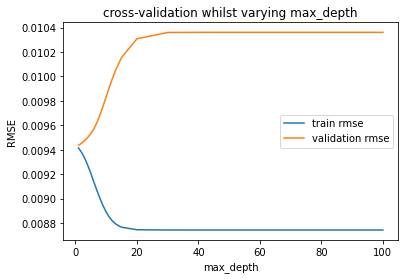

In [28]:
from sklearn.model_selection import validation_curve

param_range = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,30,40,50,75,100]

train_scores, valid_scores = validation_curve(RandomForestRegressor(n_estimators=100, random_state=1), X_train, y_train, "max_depth",
                                               param_range, scoring='neg_mean_squared_error', cv=5)
train_scores = np.sqrt(np.abs(train_scores))
valid_scores = np.sqrt(np.abs(valid_scores))

train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

plt.title("cross-validation whilst varying max_depth")
plt.xlabel("max_depth")
plt.ylabel("RMSE")
plt.plot(param_range, train_scores_mean, label="train rmse")
plt.plot(param_range, valid_scores_mean, label="validation rmse")

plt.legend()
plt.show()

In [29]:
from sklearn.model_selection import TimeSeriesSplit

In [30]:
tscv = TimeSeriesSplit(n_splits=5)

for train_index, test_index in tscv.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)


TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244

In [31]:
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4],[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

tscv = TimeSeriesSplit(n_splits=5)

for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [0 1 2 3 4] TEST: [5]
TRAIN: [0 1 2 3 4 5] TEST: [6]
TRAIN: [0 1 2 3 4 5 6] TEST: [7]
TRAIN: [0 1 2 3 4 5 6 7] TEST: [8]
TRAIN: [0 1 2 3 4 5 6 7 8] TEST: [9]


In [32]:
for train_index, test_index in tscv.split(X):
    # 80:20 training:validation inner loop split
    inner_split_point = int(0.8*len(train_index))
    
    valid_index = train_index[inner_split_point:]
    train_index = train_index[:inner_split_point]

    print("TRAIN:", train_index, "VALID:", valid_index, "TEST:", test_index)
    
    X_train, X_valid, X_test = X[train_index], X[valid_index], X[test_index]
    y_train, y_valid, y_test = y[train_index], y[valid_index], y[test_index]

TRAIN: [0 1 2 3] VALID: [4] TEST: [5]
TRAIN: [0 1 2 3] VALID: [4 5] TEST: [6]
TRAIN: [0 1 2 3 4] VALID: [5 6] TEST: [7]
TRAIN: [0 1 2 3 4 5] VALID: [6 7] TEST: [8]
TRAIN: [0 1 2 3 4 5 6] VALID: [7 8] TEST: [9]


In [33]:
from sklearn.model_selection import GroupKFold

X = [0.1, 0.2, 2.2, 2.4, 2.3, 4.55, 5.8, 8.8, 9, 10]
y = ["a", "b", "b", "b", "c", "c", "c", "d", "d", "d"]
groups = [1, 1, 1, 2, 2, 2, 3, 3, 3, 3]

gkf = GroupKFold(n_splits=3)

for train, test in gkf.split(X, y, groups=groups):
    print("TRAIN INDEXES: {} TEST INDEXES: {}".format(train, test))

TRAIN INDEXES: [0 1 2 3 4 5] TEST INDEXES: [6 7 8 9]
TRAIN INDEXES: [0 1 2 6 7 8 9] TEST INDEXES: [3 4 5]
TRAIN INDEXES: [3 4 5 6 7 8 9] TEST INDEXES: [0 1 2]
